In [97]:
#importing necessary packages

import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [98]:
#importing dataset

twit_data=pd.read_csv("information.csv")
twit_data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.587400e+17,Verona ���,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,@bitemyapp i had noticed your tendency to pee ...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


# cleaning the data

In [99]:
#function to remove unwanted symbols and all

def cleanTxt(text):
    text=re.sub('@[A-Za-z0–9]+', '', text)
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text)
    return text

In [100]:
twit_data['text'] = twit_data['text'].apply(cleanTxt)

In [101]:
twit_data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi - Looking at the url - do you use ?! Don'...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"...Fine, and I'll drink tea too. I love you.",NaN,783,10/26/15 13:20,6.587400e+17,Verona ���,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,https://pbs.twimg.com/profile_images/657716093...,0,0,i had noticed your tendency to pee on the car...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN


In [102]:
twit_data.info

<bound method DataFrame.info of         _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      815719226    False   finalized                   3    10/26/15 23:24   
1      815719227    False   finalized                   3    10/26/15 23:30   
2      815719228    False   finalized                   3    10/26/15 23:33   
3      815719229    False   finalized                   3    10/26/15 23:10   
4      815719230    False   finalized                   3     10/27/15 1:15   
...          ...      ...         ...                 ...               ...   
20045  815757572     True      golden                 259               NaN   
20046  815757681     True      golden                 248               NaN   
20047  815757830     True      golden                 264               NaN   
20048  815757921     True      golden                 250               NaN   
20049  815757985     True      golden                 249               NaN   

       gender  gend

In [103]:
twit_data.isnull().sum(axis=0).sort_values

<bound method Series.sort_values of _unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64>

In [104]:
#dropping the unwanted columns

twit_data.drop(['user_timezone','tweet_location','tweet_coord','profile_yn_gold','fav_number','sidebar_color','retweet_count'],axis=1)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,gender_gold,link_color,name,profileimage,text,tweet_count,tweet_created,tweet_id
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,NaN,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,Robbie E Responds To Critics After Win Against...,110964,10/26/15 12:40,6.587300e+17
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,NaN,0084B4,DavdBurnett,https://pbs.twimg.com/profile_images/539604221...,���It felt like they were my friends and I was...,7471,10/26/15 12:40,6.587300e+17
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,NaN,ABB8C2,lwtprettylaugh,https://pbs.twimg.com/profile_images/657330418...,i absolutely adore when louis starts the songs...,5617,10/26/15 12:40,6.587300e+17
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",NaN,0084B4,douggarland,https://pbs.twimg.com/profile_images/259703936...,Hi - Looking at the url - do you use ?! Don'...,1693,10/26/15 12:40,6.587300e+17
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,NaN,3B94D9,WilfordGemma,https://pbs.twimg.com/profile_images/564094871...,Watching Neighbours on Sky+ catching up with t...,31462,10/26/15 12:40,6.587300e+17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,(rp),female,0084B4,capuletrosa,https://pbs.twimg.com/profile_images/656793310...,"...Fine, and I'll drink tea too. I love you.",783,10/26/15 13:20,6.587400e+17
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,"Whatever you like, it's not a problem at all. ...",male,CFB929,BenNight41,https://pbs.twimg.com/profile_images/639815429...,Greg Hardy you a good player and all but don't...,13523,10/26/15 12:40,6.587300e+17
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,#TeamBarcelona ..You look lost so you should f...,male,0084B4,realuzzyfluxz,https://pbs.twimg.com/profile_images/655473271...,You can miss people and still never want to se...,26419,10/26/15 13:20,6.587400e+17
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,Anti-statist; I homeschool my kids. Aspiring t...,female,9266CC,argumatronic,https://pbs.twimg.com/profile_images/657716093...,i had noticed your tendency to pee on the car...,56073,10/26/15 12:40,6.587300e+17


In [105]:
twit_data.isnull().sum()

_unit_id                     0
_golden                      0
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           26
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3744
fav_number                   0
gender_gold              20000
link_color                   0
name                         0
profile_yn_gold          20000
profileimage                 0
retweet_count                0
sidebar_color                0
text                         0
tweet_coord              19891
tweet_count                  0
tweet_created                0
tweet_id                     0
tweet_location            7484
user_timezone             7798
dtype: int64

In [106]:
twit_data.drop(['tweet_location'],axis=1)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi - Looking at the url - do you use ?! Don'...,NaN,1693,10/26/15 12:40,6.587300e+17,Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,yes,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"...Fine, and I'll drink tea too. I love you.",NaN,783,10/26/15 13:20,6.587400e+17,NaN
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,yes,https://pbs.twimg.com/profile_images/639815429...,0,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,NaN
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,yes,https://pbs.twimg.com/profile_images/655473271...,0,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,NaN
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,yes,https://pbs.twimg.com/profile_images/657716093...,0,0,i had noticed your tendency to pee on the car...,NaN,56073,10/26/15 12:40,6.587300e+17,NaN


data vizualization

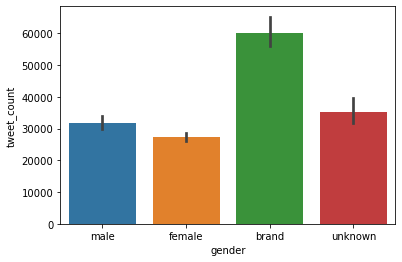

In [107]:
sns.barplot (x = 'gender', y = 'tweet_count',data = twit_data)

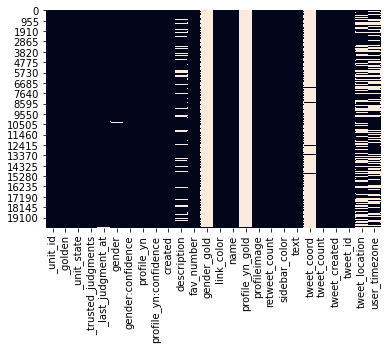

In [108]:
sns.heatmap(twit_data.isnull(), cbar=False)

In [109]:
twit_data['gender'].count()

19953

In [110]:
twit_data['gender'].value_counts(dropna=False) 

female     6700
male       6194
brand      5942
unknown    1117
NaN          97
Name: gender, dtype: int64

In [111]:
twit_data['description']

0                                    i sing my own rhythm.
1        I'm the author of novels filled with family dr...
2                      louis whining and squealing and all
3        Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4        Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
                               ...                        
20045                                                 (rp)
20046    Whatever you like, it's not a problem at all. ...
20047    #TeamBarcelona ..You look lost so you should f...
20048    Anti-statist; I homeschool my kids. Aspiring t...
20049                       Teamwork makes the dream work.
Name: description, Length: 20050, dtype: object

In [112]:
twit_data=twit_data.dropna(subset=['gender'],how='any') 

cleaning all the unwanted symbols hashtags and converting the text to lower cases to make it a clean data

In [113]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

In [114]:
twit_data['Tweet_words'] = [cleaning(s) for s in twit_data['text']]
twit_data['Description'] = [cleaning(s) for s in twit_data['description']]

In [115]:
twit_data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,Tweet_words,Description
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,robbie e responds to critics after win against...,i sing my own rhythm
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,C0DEED,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),it felt like they were my friends and i was l...,i m the author of novels filled with family dr...
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,i absolutely adore when louis starts the songs...,louis whining and squealing and all
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,C0DEED,Hi - Looking at the url - do you use ?! Don'...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),hi looking at the url do you use don t typical...,mobile guy ers shazam google kleiner perkins y...
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,watching neighbours on sky catching up with th...,ricky wilson the best frontman kaiser chiefs t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20045,815757572,True,golden,259,NaN,female,1.0000,yes,1.0,8/5/15 21:16,...,C0DEED,"...Fine, and I'll drink tea too. I love you.",NaN,783,10/26/15 13:20,6.587400e+17,Verona ���,NaN,fine and i ll drink tea too i love you,rp
20046,815757681,True,golden,248,NaN,male,1.0000,yes,1.0,8/15/12 21:17,...,0,Greg Hardy you a good player and all but don't...,NaN,13523,10/26/15 12:40,6.587300e+17,"Kansas City, MO",NaN,greg hardy you a good player and all but don t...,whatever you like it s not a problem at all ch...
20047,815757830,True,golden,264,NaN,male,1.0000,yes,1.0,9/3/12 1:17,...,C0DEED,You can miss people and still never want to se...,NaN,26419,10/26/15 13:20,6.587400e+17,Lagos Nigeria,NaN,you can miss people and still never want to se...,teambarcelona you look lost so you should fol...
20048,815757921,True,golden,250,NaN,female,0.8489,yes,1.0,11/6/12 23:46,...,0,i had noticed your tendency to pee on the car...,NaN,56073,10/26/15 12:40,6.587300e+17,Texas Hill Country,NaN,i had noticed your tendency to pee on the car...,anti statist i homeschool my kids aspiring tho...


importing stopwords

In [116]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priyatham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

removing all the stop words from the text

In [118]:
twit_data['tweet'] =twit_data.loc[:, 'Tweet_words']
twit_data['Tweet_words']=twit_data['Tweet_words'].str.lower().str.split()
#tokenization is also applied to spli the sentence into seperate words to analyze
twit_data['Tweet_words']=twit_data['Tweet_words'].apply(lambda x:[item for item in x if item not in stop])

In [119]:
twit_data.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,Tweet_words,Description,tweet
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,"[robbie, e, responds, critics, win, eddie, edw...",i sing my own rhythm,robbie e responds to critics after win against...
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,���It felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),"[felt, like, friends, living, story, retired, ...",i m the author of novels filled with family dr...,it felt like they were my friends and i was l...
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,"[absolutely, adore, louis, starts, songs, hits...",louis whining and squealing and all,i absolutely adore when louis starts the songs...
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,Hi - Looking at the url - do you use ?! Don'...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),"[hi, looking, url, use, typically, see, advanc...",mobile guy ers shazam google kleiner perkins y...,hi looking at the url do you use don t typical...
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,"[watching, neighbours, sky, catching, neighbs,...",ricky wilson the best frontman kaiser chiefs t...,watching neighbours on sky catching up with th...


# problem one: most common words used

In [120]:
from collections import Counter
words=Counter()
for twit in twit_data['tweet']:
    for x in twit.split(' '):
        words[x]+=1

words.most_common(20)

[('', 23947),
 ('the', 15698),
 ('and', 12539),
 ('i', 7096),
 ('to', 6051),
 ('a', 4758),
 ('you', 4372),
 ('of', 4172),
 ('in', 3493),
 ('for', 3202),
 ('it', 3201),
 ('is', 2989),
 ('s', 2785),
 ('weather', 2709),
 ('on', 2395),
 ('get', 2267),
 ('my', 2207),
 ('from', 2120),
 ('me', 2117),
 ('that', 1970)]

In [121]:
words_filtered = Counter()
for x, y in words.items():
    if not x in stop:
        words_filtered[x]=y

words_filtered.most_common(20)

[('', 23947),
 ('weather', 2709),
 ('get', 2267),
 ('channel', 1387),
 ('updates', 1356),
 ('like', 1009),
 ('one', 795),
 ('love', 727),
 ('new', 698),
 ('day', 620),
 ('time', 613),
 ('go', 583),
 ('people', 566),
 ('amp', 562),
 ('see', 493),
 ('know', 493),
 ('best', 491),
 ('last', 481),
 ('good', 446),
 ('back', 444)]

now splitting the most common words used by male and female

In [122]:
Male=twit_data[twit_data['gender']=='male']
Female=twit_data[twit_data['gender']=='female']

In [123]:
Male_words=pd.Series(' '.join(Male['Tweet_words'].astype(str)).lower().split(" ")).value_counts()[:10]
Female_words=pd.Series(' '.join(Female['Tweet_words'].astype(str)).lower().split(" ")).value_counts()[:10]

most common words used by male

In [124]:
Male_words

'like',      303
'get',       297
'new',       190
'one',       187
'go',        177
'time',      174
'love',      153
'people',    149
'amp',       144
'day',       143
dtype: int64

most common words used by female

In [125]:
Female_words

'like',      372
'get',       300
'one',       250
'day',       236
'go',        229
'love',      207
'amp',       188
'people',    187
'time',      184
'last',      171
dtype: int64

visualizing the above data

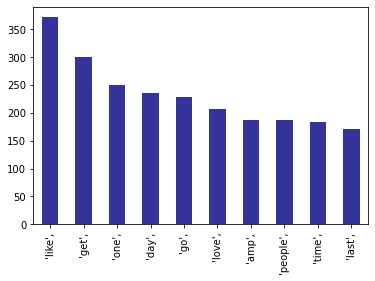

In [126]:
Female_words.plot(kind='bar',stacked=True,colormap='terrain')

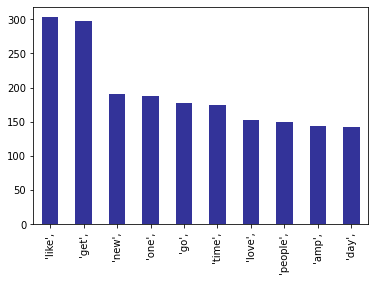

In [127]:
Male_words.plot(kind='bar',stacked=True,colormap='terrain')

splitting the data for training

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Setting up training and testing data 
encoder=LabelEncoder()
y=encoder.fit_transform(twit_data['gender'])
X=twit_data['tweet']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, stratify=y)

# applying the first model logistic regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

tfidf = TfidfVectorizer(lowercase=False)
clf = Pipeline([('vect', tfidf),('clf', LogisticRegression(multi_class='ovr', random_state=40))])

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions)*100)

Accuracy: 50.73160954099018


# Random forest algorithm

In [130]:
from sklearn.ensemble import RandomForestClassifier

n = range (1,100,10)

tfidf = TfidfVectorizer(lowercase=False)
clf = Pipeline([('vect', tfidf),('clf', RandomForestClassifier(n_estimators = 40, random_state=50))])

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions)*100)

Accuracy: 48.32631789937864


# support vector clustering(SVC) algorithm

In [131]:
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase=False)
clf = Pipeline([('vect', tfidf),('clsf', SVC(kernel = 'rbf'))])

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print('Accuracy:',accuracy_score(y_test,predictions)*100)

Accuracy: 51.172579675285625


# second problem: common emotions used 

importing word cloud and data though image

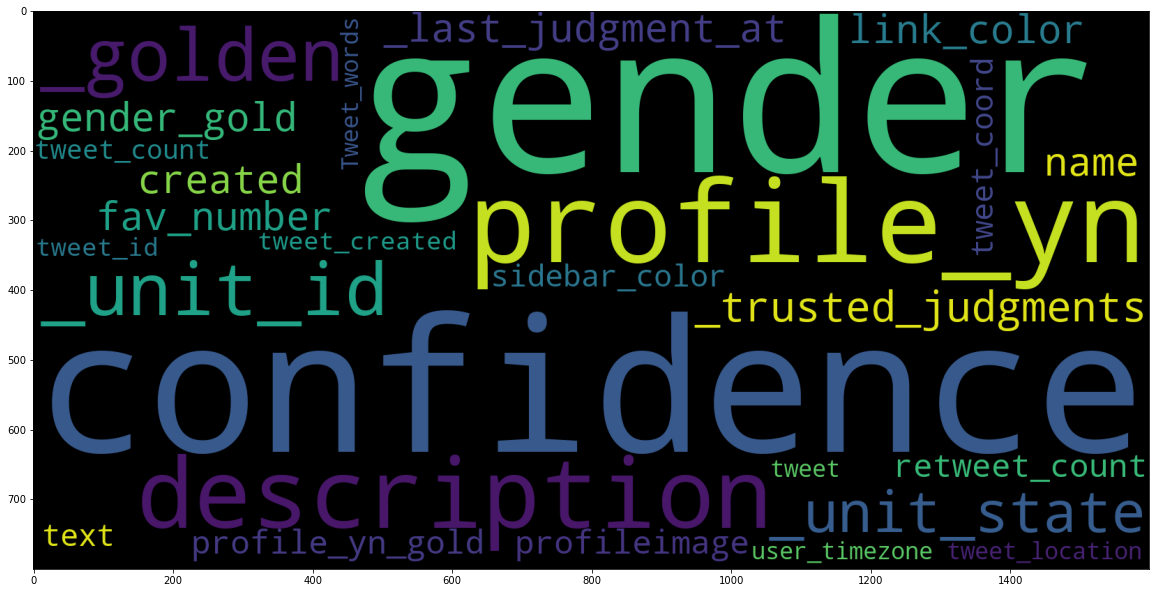

In [132]:

import import_ipynb
import wordcloud
from wordcloud import WordCloud

data_neg =twit_data[:800]

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_neg))


looking for positive and negative words from data

In [133]:
data_pos =twit_data[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

vectorizing to convert tokens to numbers

In [134]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [135]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

a function to display classification report

In [136]:
from sklearn.metrics import classification_report

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))

# Naive Bayes model

In [137]:
from sklearn.naive_bayes import BernoulliNB

BNBmodel=BernoulliNB(alpha = 2)
BNBmodel.fit(X_train,y_train)
model_Evaluate(BNBmodel)

              precision    recall  f1-score   support

           0       0.74      0.37      0.49      1486
           1       0.40      0.95      0.56      1675
           2       0.51      0.08      0.14      1549
           3       0.00      0.00      0.00       279

    accuracy                           0.45      4989
   macro avg       0.41      0.35      0.30      4989
weighted avg       0.51      0.45      0.38      4989



C:\Users\priyatham\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVC model

In [138]:
from sklearn.svm import LinearSVC

SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

              precision    recall  f1-score   support

           0       0.61      0.56      0.58      1486
           1       0.49      0.58      0.54      1675
           2       0.44      0.47      0.46      1549
           3       0.16      0.01      0.02       279

    accuracy                           0.51      4989
   macro avg       0.43      0.41      0.40      4989
weighted avg       0.50      0.51      0.50      4989



# Logistic regrssion model

In [139]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      1486
           1       0.50      0.60      0.55      1675
           2       0.44      0.47      0.46      1549
           3       0.00      0.00      0.00       279

    accuracy                           0.51      4989
   macro avg       0.39      0.41      0.40      4989
weighted avg       0.49      0.51      0.50      4989

